In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import seaborn as sns

### Simplest of Possible GPs
###### sample from GP prior with a linear kernel

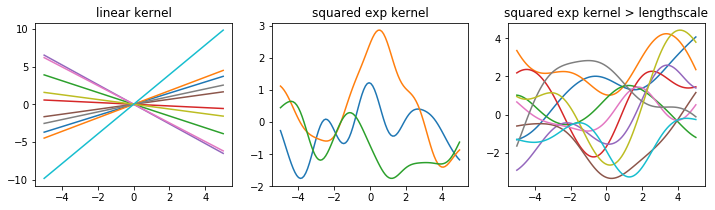

In [366]:
# kernel function gives you the covariance matrix between vectors a and b
n = 100
x = np.linspace(-5,5,n)



def kernel(a,b, t_kernel ='sqexp', l=1, sigmay=0, sigmaf=1):
    a , b = a[:,None], b[:,None]
    if t_kernel == 'linear':
        return   (a @ b.T)  * 1
    if t_kernel == 'sqexp':
        diff = (a-b.T)**2
        return sigmaf**2 * np.exp((-1/(2*l**2)) * diff) # + sigmay**2 * np.eye(np.size(b))



def GP(x, y, t_kernel='linear', l=1, sigmay=1, sigmaf=1, n_functions=10):
    
    # User defined kernel on user defined dimensions
    # returns nxn covariance matrix
    K = kernel(x,y, t_kernel=t_kernel, sigmay=sigmay, sigmaf=sigmaf,l=l)
    # Use Cholesky decomposition K = LL.T (the square root of a matrix)
    L = np.linalg.cholesky(K + 1e-13*np.eye(n))
    # sample from random normal
    rand = np.random.normal(size=(n,n_functions))
    func = L @ rand
    return func, L, K

f1,L1,K1 = GP(x,x,t_kernel='linear')
f2,L2,K2 = GP(x,x,t_kernel='sqexp', n_functions=3)
f3,L3,K3 = GP(x,x,t_kernel='sqexp',sigmay=1e-4,sigmaf=2,l=2)

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(12,3))
ax[0].plot(x,f1)
ax[0].set_title('linear kernel')
ax[1].plot(x,f2)
ax[1].set_title('squared exp kernel')
ax[2].plot(x,f3)
ax[2].set_title('squared exp kernel > lengthscale');

Essentially what is happening here is that I am generating a random vector (rand) of size (n,1) from a standard normal distribution N(0,1). I am then matrix multiplying this realization (rand) to the square root of the covariance matrix K. 

$f_{*} \sim \mu + L\mathcal{N}{(0, I)}$

$LL^T = \Sigma_{*}$ 

This imparts some of the information on how similar we think our data should be. Here I am simply using the x axis as the measure of similarity, but this doesn't have to be the case. 

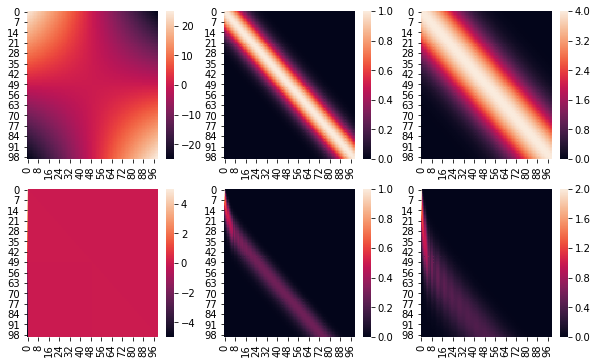

In [367]:
# differnt kernel covariance matrices and their respective square roots L
fig, ax = plt.subplots(2,3, figsize=(10,6))
sns.heatmap(K1, ax=ax[0,0])
sns.heatmap(K2, ax=ax[0,1])
sns.heatmap(K3, ax=ax[0,2])
sns.heatmap(L1, ax=ax[1,0])
sns.heatmap(L2, ax=ax[1,1])
sns.heatmap(L3, ax=ax[1,2]);

###### Now fit GP to some Data

In [368]:
n=5

# Noiseless training data
Xtrain = np.array([-3,-4,-2,0])
ytrain = np.sin(Xtrain)

Xtest = np.linspace(-6,6,n)
ytest = np.sin(Xtest)

#Apply Kernel function to test data
K_ss = K2
L_ss = None
#Apply Kernel function to training data
K = kernel(Xtrain, Xtrain)
L = np.linalg.cholesky(K + 1e-4*np.eye(len(Xtrain)))
# Apply Kernel function to training/test data
K_s = kernel(Xtrain, Xtest)
Lk = np.linalg.solve(L, K_s)

# Compute the standard deviation so we can plot it
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)[:,None]
# 
mu = Lk.T @ np.linalg.solve(L,ytrain)[:,None]

# Draw samples from the posterior at our test points.
L_ss = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = L_ss @ np.random.normal(size=(n,3)) + mu.reshape(-1,1)

plt.plot(Xtrain, ytrain, 'bs', ms=8)
plt.plot(Xtest, f_post)
#plt.gca().fill_between(Xtest, mu-2*stdv, mu+2*stdv, color="#dddddd")
#plt.plot(Xtest, mu, 'or')
#plt.axis([-5, 5, -3, 3])
plt.title('Three samples from the GP posterior')
plt.show()

ValueError: operands could not be broadcast together with shapes (100,) (5,) 

In [369]:
L.shape, K.shape, K_s.shape, mu.shape, mu.reshape(-1,1).shape, stdv.shape


((4, 4), (4, 4), (4, 5), (50,), (50, 1), (50,))

In [370]:
# Noiseless training data
Xtrain = np.array([-4, -3, -2, -1, 1]).reshape(5,1)
ytrain = np.sin(Xtrain)

# Apply the kernel function to our training points
K = kernel(Xtrain, Xtrain, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(Xtrain)))

# Compute the mean at our test points.
K_s = kernel(Xtrain, Xtest, param)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain)).reshape((n,))

# Compute the standard deviation so we can plot it
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)
# Draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3)))

pl.plot(Xtrain, ytrain, 'bs', ms=8)
pl.plot(Xtest, f_post)
pl.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP posterior')
pl.show()

TypeError: unsupported operand type(s) for +: 'NoneType' and 'float'

In [139]:
L.shape, rand.shape

((20, 20), (20, 1))

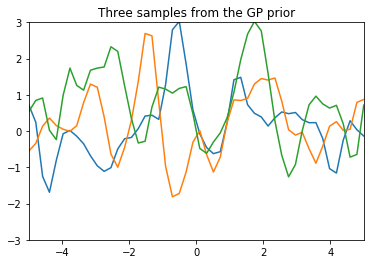

In [358]:


# Test data
n = 50
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

# Define the kernel function
def kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)

param = 0.1
K_ss = kernel(Xtest, Xtest, param)

# Get cholesky decomposition (square root) of the
# covariance matrix
L = np.linalg.cholesky(K_ss + 1e-15*np.eye(n))
# Sample 3 sets of standard normals for our test points,
# multiply them by the square root of the covariance matrix
f_prior = np.dot(L, np.random.normal(size=(n,3)))

# Now let's plot the 3 sampled functions.
plt.plot(Xtest, f_prior)
plt.axis([-5, 5, -3, 3])
plt.title('Three samples from the GP prior')
plt.show()

In [359]:
K_ss.shape, Xtest.shape

((50, 50), (50, 1))

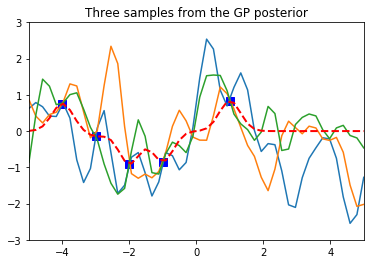

In [360]:
# Noiseless training data
Xtrain = np.array([-4, -3, -2, -1, 1]).reshape(5,1)
ytrain = np.sin(Xtrain)

# Apply the kernel function to our training points
K = kernel(Xtrain, Xtrain, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(Xtrain)))

# Compute the mean at our test points.
K_s = kernel(Xtrain, Xtest, param)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain)).reshape((n,))

# Compute the standard deviation so we can plot it
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)
# Draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3)))

pl.plot(Xtrain, ytrain, 'bs', ms=8)
pl.plot(Xtest, f_post)
#pl.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP posterior')
pl.show()

In [364]:
K.shape, K_ss.shape, Xtrain.shape, Xtest.shape, K_s.shape

((5, 5), (50, 50), (5, 1), (50, 1), (5, 50))

In [365]:
np.linalg.solve?

In [13]:
# A one dimensional column vector of inputs.
Xtrain = np.array([-4, -3, -2, -1, 1]).reshape(5,1)
ytrain = np.sin(Xtrain)

with pm.Model() as model:
    # Specify the covariance function.
    cov_func = pm.gp.cov.ExpQuad(1, ls=0.1)

    # Specify the GP.  The default mean function is `Zero`.
    gp = pm.gp.Latent(cov_func=cov_func)

    # Place a GP prior over the function f.
    f = gp.prior("f", X=X)

...

# After fitting or sampling, specify the distribution
# at new points with .conditional
Xnew = np.linspace(-1, 2, 50)[:, None]

with model:
    fcond = gp.conditional("fcond", Xnew=Xnew)